# MIE451/1513 Decision Support System -- Data Science Solution

## Be sure to let us know:
i. what location you chose (and remember to sign up on Piazza so there are no duplicates),

Cornwall, Ontario

ii. what preprocessing steps you implemented

Just the recommended filtering step on Piazza for ensuring all the hotels are from Cornwall, Ontario

In [1]:
# importing useful libraries

#Plot
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
from wordcloud import WordCloud

#Data Packages
import math
import pandas as pd
import numpy as np

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk

## Download Resources
nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")

from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.data import find

## Machine Learning
import sklearn
import sklearn.metrics as metrics

## Data Visualization
import folium
from tabulate import tabulate
from scipy.stats.kde import gaussian_kde

## Geolocation
import geopy
from geopy.geocoders import Photon
from geopy.extra.rate_limiter import RateLimiter

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kirby\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kirby\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\kirby\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kirby\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
%matplotlib inline
# setting pandas' display
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 500)

# Q1

In [3]:
df = pd.read_csv('reviews.csv', header=None)
df.columns = ['filePath','hotelName','reviewColumn','ratingScore','groundTruth',
               'date_stamp','streetAddress', 'City',
               'Province','postalCode']
#['path','hotel','review','score','bool','date','address','city','province','postal']

In [4]:
df.head()

,filePath,hotelName,reviewColumn,ratingScore,groundTruth,date_stamp,streetAddress,City,Province,postalCode
0,data\ca\181722\12159917\554470743.html,Martin&#39;s Inn,"""Should have known better . upon checking in was told that service at Christmas \u002F Boxing Day would be minimal. DID not know that meant NON existent. We never got room clean up \u002F towel refresh or any service at all for the 1 week we were their. December 20 to December 27th. On day 2 the husband told us his wife would be around to change the bedding and towels on Day 3 .. that never happened. When I called the front desk I was told I had to come get my own clean sheets and towels if...",1,negative,"January 17, 2018",2200 Vincent Massey Dr,"('Cornwall',)",Ontario,K6H 5R6
1,data\ca\181722\12159917\587350242.html,Martin&#39;s Inn,"""Traveling from PEI back to our home.\nLooked at the ads online and opted for this one because it said soaker tub. Disappointed it was a regular tub however room was spotless. Staff were very friendly. I asked for ice and the owner went to his place and brought me his ice cube trays from home...\nThat is what made this a 5 star for me",5,positive,"June 14, 2018",2200 Vincent Massey Dr,"('Cornwall',)",Ontario,K6H 5R6
2,data\ca\181722\12159917\587717143.html,Martin&#39;s Inn,"""Old Motel, and not very clean.\nThe bathroom door was so crooked that it could not even be closed...so how do you use the bathroom, we got the offer to move, but we just realized it late in the evening and had everything unpacked, therefore declined.",2,negative,"June 15, 2018",2200 Vincent Massey Dr,"('Cornwall',)",Ontario,K6H 5R6
3,data\ca\181722\12159917\588650757.html,Martin&#39;s Inn,"""What a gem! What a wonderful welcome. The room is spacious, nicely decorated and has a fridge and microwave... looking out onto the garden with barbecues and picnic areas for the guests just gives you such a homely feeling... A perfect stopover",5,positive,"June 18, 2018",2200 Vincent Massey Dr,"('Cornwall',)",Ontario,K6H 5R6
4,data\ca\181722\12159917\594740059.html,Martin&#39;s Inn,"""I found a bed bug under my mattress when I checked it settling in, and the air conditioning gave off such a stench that I had leave the room for several hours, when I reported the bug and the air conditioning problem, they said I could have another room, so I took another one, didn\u2019t find a bed bug, but the air conditioner stank again, horrible motel",1,negative,"July 10, 2018",2200 Vincent Massey Dr,"('Cornwall',)",Ontario,K6H 5R6


In [5]:
# Use vader to evaluated sentiment of reviews
def evalSentences(sentences, to_df=False, columns=[]):
    #Instantiate an instance to access SentimentIntensityAnalyzer class
    sid = SentimentIntensityAnalyzer()
    pdlist = []
    if to_df:
        for sentence in tqdm(sentences):
            ss = sid.polarity_scores(sentence)
            pdlist.append([sentence]+[ss['compound']])
        reviewDf = pd.DataFrame(pdlist)
        reviewDf.columns = columns
        return reviewDf

    else:
        for sentence in tqdm(sentences):
            print(sentence)
            ss = sid.polarity_scores(sentence)
            for k in sorted(ss):
                print('{0}: {1}, '.format(k, ss[k]), end='')
            print()

In [8]:
reviewDF = evalSentences(df['reviewColumn'].values, to_df=True, columns=['reviewCol','vader'])

  6%|▌         | 180/2889 [00:00<00:01, 1751.68it/s]

100%|██████████| 2889/2889 [00:01<00:00, 1764.02it/s]


In [9]:
df['vader'] = reviewDF['vader']

In [10]:
df.groupby('hotelName', as_index=False)[['ratingScore','vader']].mean()

,hotelName,ratingScore,vader
0,Auberge Chesley&#39;s Inn,4.807018,0.935478
1,Best Western Parkway Inn &amp; Conference Centre,4.548885,0.874945
2,Century Motel,4.233766,0.834825
3,Comfort Inn,3.031034,0.574015
4,Elect Inn 5,3.323077,0.529631
5,First Canada Inns,4.015873,0.729245
6,Howard Johnson by Wyndham Cornwall,1.789474,0.041847
7,Indigo Inn,2.187500,0.201037
8,Martin&#39;s Inn,2.666667,0.303600
9,Monte Carlo Motel,1.800000,-0.029906


In [11]:
hotel_scores = df.groupby('hotelName', as_index=False)[['ratingScore','vader']].mean()
hotel_scores['vader_median'] = df.groupby('hotelName', as_index=False)['vader'].median()['vader']
hotel_scores.columns = ['hotelName','mean ground truth', 'mean vader compound', 'median vader compound']
hotel_scores

,hotelName,mean ground truth,mean vader compound,median vader compound
0,Auberge Chesley&#39;s Inn,4.807018,0.935478,0.97300
1,Best Western Parkway Inn &amp; Conference Centre,4.548885,0.874945,0.95730
2,Century Motel,4.233766,0.834825,0.93160
3,Comfort Inn,3.031034,0.574015,0.89950
4,Elect Inn 5,3.323077,0.529631,0.83600
5,First Canada Inns,4.015873,0.729245,0.92585
6,Howard Johnson by Wyndham Cornwall,1.789474,0.041847,0.03870
7,Indigo Inn,2.187500,0.201037,0.45765
8,Martin&#39;s Inn,2.666667,0.303600,0.37765
9,Monte Carlo Motel,1.800000,-0.029906,-0.36370


In [12]:
true_sort = hotel_scores.sort_values('mean ground truth', ascending=False, ignore_index=True)
top_5_true = true_sort[:5]['hotelName']
bottom_5_true = true_sort[-5:]['hotelName']
true_sort

,hotelName,mean ground truth,mean vader compound,median vader compound
0,Auberge Chesley&#39;s Inn,4.807018,0.935478,0.97300
1,Best Western Parkway Inn &amp; Conference Centre,4.548885,0.874945,0.95730
2,Century Motel,4.233766,0.834825,0.93160
3,First Canada Inns,4.015873,0.729245,0.92585
4,Ramada by Wyndham Cornwall,3.958763,0.727240,0.92645
5,Elect Inn 5,3.323077,0.529631,0.83600
6,Super 8 by Wyndham Cornwall ON,3.276364,0.476064,0.83920
7,Regency Inn &amp; Suites,3.200000,0.786460,0.97800
8,Comfort Inn,3.031034,0.574015,0.89950
9,Martin&#39;s Inn,2.666667,0.303600,0.37765


In [13]:
vader_mean_sort = hotel_scores.sort_values('mean vader compound', ascending=False, ignore_index=True)
top_5_vader_mean = vader_mean_sort[:5]['hotelName']
bottom_5_vader_mean = vader_mean_sort[-5:]['hotelName']
vader_mean_sort

,hotelName,mean ground truth,mean vader compound,median vader compound
0,Auberge Chesley&#39;s Inn,4.807018,0.935478,0.97300
1,Best Western Parkway Inn &amp; Conference Centre,4.548885,0.874945,0.95730
2,Century Motel,4.233766,0.834825,0.93160
3,Regency Inn &amp; Suites,3.200000,0.786460,0.97800
4,First Canada Inns,4.015873,0.729245,0.92585
5,Ramada by Wyndham Cornwall,3.958763,0.727240,0.92645
6,Comfort Inn,3.031034,0.574015,0.89950
7,Elect Inn 5,3.323077,0.529631,0.83600
8,Super 8 by Wyndham Cornwall ON,3.276364,0.476064,0.83920
9,Martin&#39;s Inn,2.666667,0.303600,0.37765


In [14]:
vader_median_sort = hotel_scores.sort_values('median vader compound', ascending=False, ignore_index=True)
top_5_vader_median = vader_median_sort[:5]['hotelName']
bottom_5_vader_median = vader_median_sort[-5:]['hotelName']
vader_median_sort

,hotelName,mean ground truth,mean vader compound,median vader compound
0,Regency Inn &amp; Suites,3.200000,0.786460,0.97800
1,Auberge Chesley&#39;s Inn,4.807018,0.935478,0.97300
2,Best Western Parkway Inn &amp; Conference Centre,4.548885,0.874945,0.95730
3,Century Motel,4.233766,0.834825,0.93160
4,Ramada by Wyndham Cornwall,3.958763,0.727240,0.92645
5,First Canada Inns,4.015873,0.729245,0.92585
6,Comfort Inn,3.031034,0.574015,0.89950
7,Super 8 by Wyndham Cornwall ON,3.276364,0.476064,0.83920
8,Elect Inn 5,3.323077,0.529631,0.83600
9,Nites Inn Motel,2.428571,0.105414,0.79600


TOP 5

In [15]:
top5 = pd.concat([top_5_true,top_5_vader_mean,top_5_vader_median], axis=1)
top5.columns = ['mean ground truth','mean vader compound','median vader compound']
top5

,mean ground truth,mean vader compound,median vader compound
0,Auberge Chesley&#39;s Inn,Auberge Chesley&#39;s Inn,Regency Inn &amp; Suites
1,Best Western Parkway Inn &amp; Conference Centre,Best Western Parkway Inn &amp; Conference Centre,Auberge Chesley&#39;s Inn
2,Century Motel,Century Motel,Best Western Parkway Inn &amp; Conference Centre
3,First Canada Inns,Regency Inn &amp; Suites,Century Motel
4,Ramada by Wyndham Cornwall,First Canada Inns,Ramada by Wyndham Cornwall


They do not agree. For the top 5, Ramada by Wyndham Cornwall is included in the mean ground truth top 5 but is not included in the mean vader top 5. Also, First Canada Inns is included in the mean ground truth, but not the median vader. Instead, Regency Inn &amp; Suites is included in both the mean and median vader compound scores top 5.

This is due to the Ramada hotel having lots of reviews (582), most of which are good (4-5 ground truth), compared to Regency which has very few reviews (5) with a lower average true score. However, due to the small number of reviews, it's easily thrown off by outliers; one such outlier exists where the true score was 3 but the vader socre was very high (0.9155, same as the true scores of 4). The review sounded extremely positive and only mentioned good things.

For First Canada Inns, there are more reviews (126) so it's a bit less affected by such outliers. But in general, it seems to have a bit more neutral sentiment scores than Ramada hotel, which skews down the median vader score, but doesn't move the overall mean by as much due to the heavy positive skew still. 

The individual placing within the top 5 changes, but that is expected due to differences in the distributions and differences between the ground truth score and the vader compound score.

In [16]:
df[np.logical_or(np.logical_or(df['hotelName'] == 'Regency Inn &amp; Suites', df['hotelName'] == 'Ramada by Wyndham Cornwall'), df['hotelName'] == 'First Canada Inns')].groupby('hotelName').size()

hotelName
First Canada Inns             126
Ramada by Wyndham Cornwall    582
Regency Inn &amp; Suites        5
dtype: int64

In [18]:
df[np.logical_or(np.logical_or(df['hotelName'] == 'Regency Inn &amp; Suites', df['hotelName'] == 'Ramada by Wyndham Cornwall'), df['hotelName'] == 'First Canada Inns')].groupby(['hotelName','ratingScore']).size()

hotelName                   ratingScore
First Canada Inns           1                9
                            2                8
                            3               17
                            4               30
                            5               62
Ramada by Wyndham Cornwall  1               29
                            2               36
                            3               86
                            4              210
                            5              221
Regency Inn &amp; Suites    1                1
                            3                1
                            4                3
dtype: int64

In [19]:
df[df['hotelName'] == 'Regency Inn &amp; Suites']

,filePath,hotelName,reviewColumn,ratingScore,groundTruth,date_stamp,streetAddress,City,Province,postalCode,vader
12,data\ca\181722\17568384\707448643.html,Regency Inn &amp; Suites,"""Needed a room for a short stopover for the night. Regular room pretty basic for $109. Took the upgrade to a suite for an extra $10. Totally worth it! Super comfy bed corner Jacuzzi tub, fireplace, sitting area out front with lounge chairs. Was one of the cheaper hotels on the strip, but for a one night quick stop, great value!",3,negative,"September 7, 2019",1620 Vincent Massey Dr,"('Cornwall',)",Ontario,K6H 5R6,0.9155
13,data\ca\181722\17568384\775239309.html,Regency Inn &amp; Suites,"""Do not stay at this motel, there are a lot of other motels in the area that are 10 times better, even the exterior was unwanting , our room had bugs and felt dirty , chunks of the porcelain on the tub was broken , just a junky motel that has been left to fall apart, the only positive thing about this place was the woman at the desk was pleasant, I\u2019m warning everyone to stay away . You have been warned.",1,negative,"October 22, 2020",1620 Vincent Massey Dr,"('Cornwall',)",Ontario,K6H 5R6,0.0772
14,data\ca\181722\17568384\796535068.html,Regency Inn &amp; Suites,"""This hotel is beautiful and I would stay again, the room was clean and felt \u201Cfancier\u201D than other hotels I have visited. The smell of cinnamon is very prominent when you walk in. The beds were very comfortable and were placed so you can perfectly see the tv from each bed. Our room (room 16) included a electronic fire place, large flatscreen TV, a jacuzzi, a mini fridge, a microwave, 2 queen beds, and a waterfall shower. I loved the modern touch to this room with the black marble a...",4,positive,"July 10, 2021",1620 Vincent Massey Dr,"('Cornwall',)",Ontario,K6H 5R6,0.9780
15,data\ca\181722\17568384\808402393.html,Regency Inn &amp; Suites,"""We were not expecting much when we drove into the parking lot, but all the other hotels in the area were full. We were pleasantly surprised when we walked into room number 7! Big king-sized bed with a corner jacuzzi. The bed was sooo comfortable, that was the best night sleep that I have had in a while! I wish I knew the make and model of that mattress! Reasonable price too! Will definitely go back.",4,positive,"September 5, 2021",1620 Vincent Massey Dr,"('Cornwall',)",Ontario,K6H 5R6,0.9808
16,data\ca\181722\17568384\912090574.html,Regency Inn &amp; Suites,"""Lovely clean room. Bed was comfy \nThe motel is very basic on the outside but beautiful rooms inside.\nI would recommend staying here. First time in Cornwall and I am so impressed. Lady at the front desk was pleasant and helpful",4,positive,"August 22, 2023",1620 Vincent Massey Dr,"('Cornwall',)",Ontario,K6H 5R6,0.9808


<Axes: xlabel='hotelName', ylabel='ratingScore'>

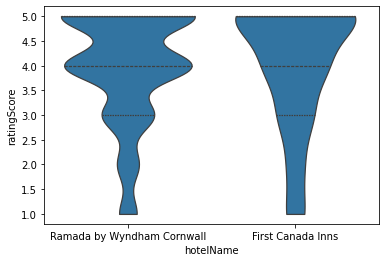

In [20]:
sns.violinplot(data=df[np.logical_or(df['hotelName'] == 'First Canada Inns', df['hotelName'] == 'Ramada by Wyndham Cornwall')], x="hotelName", y="ratingScore", inner = 'quart', cut=0)

<Axes: xlabel='hotelName', ylabel='vader'>

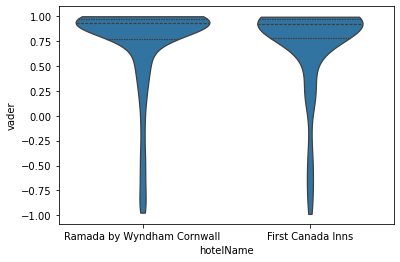

In [21]:
sns.violinplot(data=df[np.logical_or(df['hotelName'] == 'First Canada Inns', df['hotelName'] == 'Ramada by Wyndham Cornwall')], x="hotelName", y="vader", inner = 'quart', cut=0)

BOTTOM 5

In [22]:
bottom5 = pd.concat([bottom_5_true,bottom_5_vader_mean,bottom_5_vader_median], axis=1)
bottom5.columns = ['mean ground truth','mean vader compound','median vader compound']
bottom5

,mean ground truth,mean vader compound,median vader compound
10,Nites Inn Motel,Indigo Inn,Indigo Inn
11,Indigo Inn,Nites Inn Motel,Martin&#39;s Inn
12,Monte Carlo Motel,Howard Johnson by Wyndham Cornwall,Howard Johnson by Wyndham Cornwall
13,OYO First Canada Hotel Cornwall Hwy 401 ON,Monte Carlo Motel,Monte Carlo Motel
14,Howard Johnson by Wyndham Cornwall,OYO First Canada Hotel Cornwall Hwy 401 ON,OYO First Canada Hotel Cornwall Hwy 401 ON


There is only one difference in the bottom 5 between the 3 ranking methods. The median vader compound doesn't have Nites Inn Motel, while it instead has Martin&#39;s Inn.

The reason for this is just due to the instability of the median for low sample sizes. Nites Inn Motel has only 7 reviews. 4 of them have very high vader scores (>0.79), while 3 of them have very negative scores (<-0.83). Given this, the median (~0.79) is a much larger number than the average, and makes it seem like the hotel is much better than the other 2 metrics.

Once again, the rankings within the top 5 also differ slightly, but that's expected due to differences in the distributions and the differences between the metrics of ground truth and vader sentiment.

In [23]:
df[np.logical_or(df['hotelName'] == 'Nites Inn Motel', df['hotelName'] == 'Martin&#39;s Inn')].groupby(['hotelName','ratingScore']).size()

hotelName         ratingScore
Martin&#39;s Inn  1              4
                  2              2
                  3              2
                  4              2
                  5              2
Nites Inn Motel   1              3
                  3              2
                  4              2
dtype: int64

In [24]:
df[df['hotelName'] == 'Nites Inn Motel'].sort_values('vader')['vader']

2271   -0.9513
2273   -0.8779
2275   -0.8342
2270    0.7960
2269    0.8272
2274    0.8422
2272    0.9359
Name: vader, dtype: float64

<Axes: xlabel='hotelName', ylabel='ratingScore'>

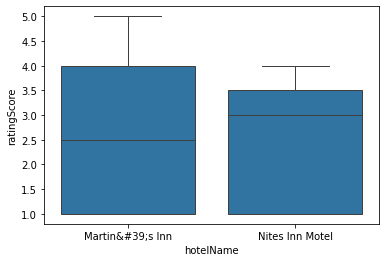

In [25]:
#fig, ax = plt.subplots(figsize=[20,5])
#plt.xticks(rotation=90)
sns.boxplot(data=df[np.logical_or(df['hotelName'] == 'Nites Inn Motel', df['hotelName'] == 'Martin&#39;s Inn')], x="hotelName", y="ratingScore")

<Axes: xlabel='hotelName', ylabel='vader'>

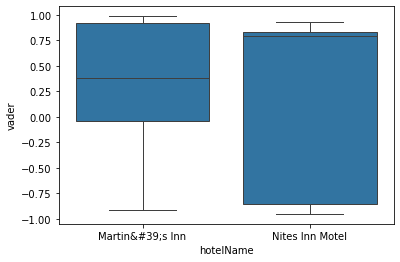

In [26]:
sns.boxplot(data=df[np.logical_or(df['hotelName'] == 'Nites Inn Motel', df['hotelName'] == 'Martin&#39;s Inn')], x="hotelName", y="vader")

# Q2

In [58]:
def get_stop_words():
    stop = set(stopwords.words('english'))
    #Add possible Stop Words for Hotel Reviews
    stop.add('hotel')
    stop.add('room')
    stop.add('rooms')
    stop.add('stay')
    stop.add('staff')
    return stop

def getTopKWords(df, kwords):

    stop = get_stop_words()
    counter = Counter()

    reviews = df['reviewColumn'].values

    for review in reviews:
            counter.update([word.lower()
                            for word
                            in re.findall(r'\w+', review)
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(kwords)
    return topk

# Note: You may want to use an NLTK tokenizer instead of a regular expression in the following
def dataFrameTransformation(df, topk):
    reviews = df['reviewColumn'].values

    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter([word.lower() for word in re.findall(r'\w+',reviews[i])])
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)


    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    #finalreviewDf = df.join(freqReviewDf)
    finaldf = df[['hotelName','ratingScore','groundTruth','reviewColumn','vader']].join(freqReviewDf)
    return finaldf

In [28]:
reviewDF

,reviewCol,vader
0,"""Should have known better . upon checking in was told that service at Christmas \u002F Boxing Day would be minimal. DID not know that meant NON existent. We never got room clean up \u002F towel refresh or any service at all for the 1 week we were their. December 20 to December 27th. On day 2 the husband told us his wife would be around to change the bedding and towels on Day 3 .. that never happened. When I called the front desk I was told I had to come get my own clean sheets and towels if...",-0.1653
1,"""Traveling from PEI back to our home.\nLooked at the ads online and opted for this one because it said soaker tub. Disappointed it was a regular tub however room was spotless. Staff were very friendly. I asked for ice and the owner went to his place and brought me his ice cube trays from home...\nThat is what made this a 5 star for me",0.1010
2,"""Old Motel, and not very clean.\nThe bathroom door was so crooked that it could not even be closed...so how do you use the bathroom, we got the offer to move, but we just realized it late in the evening and had everything unpacked, therefore declined.",0.0000
3,"""What a gem! What a wonderful welcome. The room is spacious, nicely decorated and has a fridge and microwave... looking out onto the garden with barbecues and picnic areas for the guests just gives you such a homely feeling... A perfect stopover",0.9273
4,"""I found a bed bug under my mattress when I checked it settling in, and the air conditioning gave off such a stench that I had leave the room for several hours, when I reported the bug and the air conditioning problem, they said I could have another room, so I took another one, didn\u2019t find a bed bug, but the air conditioner stank again, horrible motel",-0.9136
...,...,...
2884,"""We spent three nights here in the Governor\u2019s Suite and enjoyed our stay very much. The Inn has been lovingly and meticulously restored in every way. We enjoyed being greeted by Hamish, the little Scottie Dog who was the Master of the House! Breakfast was always a nice time to meet other folks staying in the remaining two rooms. The breakfasts showcased fresh and local ingredients. The Inn is well located to restaurants, shops and the river. Highly recommend.",0.9738
2885,"""Quaint and comfortable B&B. Great location, easy one block walk to a paved trail that goes along the St Lawrence river, the trail goes through a nice park. Wonderful breakfast, attentive host, comfortable room, beautiful outdoor space and a friendly dog name Hamish.",0.9758
2886,"""We stayed a night in this lovley very clean inn after a day of cycling and gearing up for a day of kayaking at Long Sault Parkway. We booked the Tudor Roon and the bed was comfy. The room and adjoining bathroom was well appointed and had individual air conditioning if needed. We walked to dinner with many choices easily within walking distance. Breakfast was delicious with very generous portions. Robert was a kind host who provided a locked garage for our bikes. A very nice overnight.",0.9651
2887,"""We stayed here while in Cornwall visiting family and attending a surprise birthday party. It was very convenient for the things we were attending. The room was very nice with lots of room. The breakfast was very good. The sitting rooms were nicely decorated and a nice place to relax. The inn is close to the waterfront and you could walk to anything downtown.",0.9582


In [29]:
# setting default parameters of WordCloud object
wordcloud_args = dict(
    width = 800,
    height = 800,
    background_color ='white',
    min_font_size = 10
    )

# fucntion to plot word cloud
def plotWordCloud(dictionary, **kwargs):
    wordcloud = WordCloud(**kwargs)
    wordcloud.generate_from_frequencies(dict(dictionary))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [30]:
topk_pos = getTopKWords(df[df['groundTruth']=='positive'], 50)
topk_pos

[('breakfast', 1308),
 ('clean', 1170),
 ('great', 1024),
 ('good', 841),
 ('friendly', 767),
 ('comfortable', 759),
 ('nice', 752),
 ('cornwall', 684),
 ('would', 666),
 ('stayed', 630),
 ('well', 551),
 ('best', 508),
 ('restaurant', 472),
 ('bed', 471),
 ('place', 466),
 ('one', 462),
 ('pool', 456),
 ('excellent', 434),
 ('area', 431),
 ('night', 431),
 ('service', 412),
 ('helpful', 381),
 ('time', 353),
 ('food', 337),
 ('recommend', 337),
 ('desk', 326),
 ('also', 298),
 ('front', 292),
 ('beds', 289),
 ('back', 288),
 ('like', 282),
 ('quiet', 274),
 ('inn', 274),
 ('western', 274),
 ('nthe', 273),
 ('location', 271),
 ('check', 270),
 ('way', 266),
 ('hot', 259),
 ('fireplace', 256),
 ('always', 255),
 ('large', 243),
 ('buffet', 242),
 ('get', 239),
 ('included', 232),
 ('definitely', 232),
 ('could', 232),
 ('really', 226),
 ('next', 223),
 ('home', 222)]

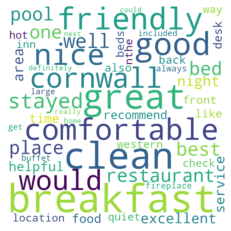

In [31]:
plotWordCloud(topk_pos, **wordcloud_args)

In [32]:
topk_neg = getTopKWords(df[df['groundTruth']=='negative'], 50)
topk_neg

[('breakfast', 484),
 ('clean', 389),
 ('would', 369),
 ('one', 355),
 ('night', 341),
 ('good', 285),
 ('desk', 284),
 ('bed', 280),
 ('front', 261),
 ('stayed', 234),
 ('place', 232),
 ('could', 228),
 ('like', 223),
 ('get', 212),
 ('pool', 206),
 ('nthe', 198),
 ('back', 193),
 ('nice', 191),
 ('bathroom', 189),
 ('door', 189),
 ('time', 177),
 ('friendly', 172),
 ('floor', 171),
 ('cornwall', 166),
 ('motel', 153),
 ('even', 152),
 ('old', 151),
 ('area', 150),
 ('coffee', 149),
 ('check', 148),
 ('price', 145),
 ('well', 144),
 ('comfortable', 141),
 ('told', 139),
 ('beds', 139),
 ('small', 137),
 ('went', 136),
 ('booked', 133),
 ('great', 131),
 ('first', 129),
 ('never', 126),
 ('dirty', 123),
 ('got', 121),
 ('also', 121),
 ('said', 117),
 ('next', 117),
 ('asked', 115),
 ('way', 112),
 ('morning', 110),
 ('smell', 105)]

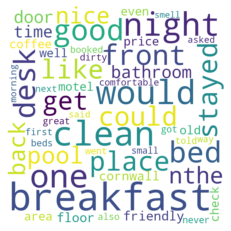

In [33]:
plotWordCloud(topk_neg, **wordcloud_args)

In [34]:
combined_words = set([i[0] for i in topk_pos] + [i[0] for i in topk_neg])
combined_count = Counter(combined_words)
for i in topk_pos+topk_neg:
    if i[0] in combined_words:
        combined_count[i[0]] += i[1]

In [35]:
combined_count.most_common(10)

[('breakfast', 1793),
 ('clean', 1560),
 ('great', 1156),
 ('good', 1127),
 ('would', 1036),
 ('nice', 944),
 ('friendly', 940),
 ('comfortable', 901),
 ('stayed', 865),
 ('cornwall', 851)]

In [36]:
', '.join([i[0] for i in combined_count.most_common(10)])

'breakfast, clean, great, good, would, nice, friendly, comfortable, stayed, cornwall'

Cornwall appears in both lists of top-50 words, which is the location of the hotels.

Many words appear in both top-50 lists. The top 10 most common shared words are breakfast, clean, great, good, would, nice, friendly, comfortable, stayed, and cornwall.

Of these, the words "clean" and "good" are similarly large in both wordclouds. This is surprising to me, since both words have positive connotations. However, it makes sense that they might be used with a negative modifier, which explains the appearance in both lists.

In [82]:
grammar1 = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}
    NP:
        {<NBAR><IN><NBAR>}
        {<NBAR>}
"""

In [38]:
# to make the results more useable, we clean up the tree results shown above.
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()
stopword_list = get_stop_words()

# generator, create item one a time
def get_terms(tree, remove_stopwords=True):
    for leaf in leaves(tree):

        term = []

        for w, t in leaf:
            if remove_stopwords:
                if acceptable_word(w):
                    term.append(normalise(w))

            else:
                term.append(normalise(w))

        # Phrase only
        if len(term) > 1:
            yield term

# generator, generate leaves one by one
def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='RB'):
        yield subtree.leaves()

# stemming, lematizing, lower case...
def normalise(word,lemmatizer=lemmatizer, stemmer=stemmer):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = stemmer.stem(word)
    word = lemmatizer.lemmatize(word)
    return word

# stop-words and length control
def acceptable_word(word, stopword_list=stopword_list):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
        and word.lower() not in stopword_list)
    return accepted

# Flatten phrase lists to get tokens for analysis
def flatten_phrase_lists(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        if len(token) > 0: # don't return empty tokens
            finalList.append(token.rstrip())
    return finalList

In [197]:
# getting top noun phrases
tagger = PerceptronTagger()
pos_tag = tagger.tag
def getTopKNP(df, kNPs, grammar):
    chunker = nltk.RegexpParser(grammar)
    counter = Counter()
    reviews = df['reviewColumn'].values

    for review in reviews:
            counter.update(flatten_phrase_lists([word
                            for word
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review))))
                            ]))
    topk = counter.most_common(kNPs)
    return topk


def NPdataFrameTransformation(df, topk, grammar):
    chunker = nltk.RegexpParser(grammar)
    reviews = reviewDF['reviewCol'].values

    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter(flatten_phrase_lists([word
                                       for word
                                       in get_terms(chunker.parse(pos_tag(re.findall(r'\w+',reviews[i]))))]))
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)


    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    #finalreviewDf = df.join(freqReviewDf)
    finaldf = df[['hotelName','ratingScore','groundTruth','reviewColumn','vader']].join(freqReviewDf)
    return finaldf

In [198]:
topk_pos = getTopKNP(df[df['groundTruth'] == 'positive'], 50, grammar1)
topk_pos

[('front desk', 140),
 ('best western', 73),
 ('breakfast buffet', 43),
 ('continent breakfast', 42),
 ('hot tub', 42),
 ('comfort bed', 40),
 ('great place', 39),
 ('second floor', 36),
 ('next morn', 35),
 ('free breakfast', 33),
 ('first time', 29),
 ('ramada cornwal', 29),
 ('park lot', 28),
 ('first floor', 27),
 ('queen bed', 26),
 ('ground floor', 25),
 ('next time', 25),
 ('comfort inn', 24),
 ('outdoor pool', 24),
 ('complimentari breakfast', 23),
 ('sport bar', 23),
 ('long day', 23),
 ('mani time', 21),
 ('buffet breakfast', 21),
 ('great locat', 19),
 ('nice touch', 18),
 ('good valu', 18),
 ('breakfast area', 18),
 ('hot breakfast', 18),
 ('long drive', 18),
 ('indoor pool', 18),
 ('cornwal area', 17),
 ('way home', 17),
 ('king bed', 17),
 ('tim horton', 17),
 ('coffe maker', 16),
 ('next day', 16),
 ('easi access', 16),
 ('quebec citi', 15),
 ('second time', 15),
 ('great valu', 14),
 ('nice place', 14),
 ('next year', 14),
 ('main floor', 14),
 ('great servic', 14),
 ('

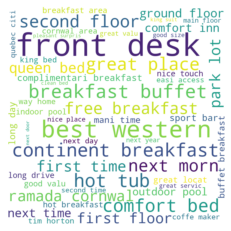

In [199]:
plotWordCloud(topk_pos, **wordcloud_args)

The phrase "long drive" is unexpected to appear in the top 50 for positive. However, it may make sense if it's used wuth a negative, such as "not a long drive", which is a common phrase.

In [200]:
topk_neg = getTopKNP(df[df['groundTruth'] == 'negative'], 50, grammar1)
topk_neg

[('front desk', 139),
 ('comfort inn', 40),
 ('second floor', 32),
 ('park lot', 31),
 ('continent breakfast', 22),
 ('next morn', 21),
 ('hot tub', 19),
 ('queen bed', 18),
 ('ground floor', 18),
 ('tim horton', 16),
 ('coffe maker', 16),
 ('air condition', 15),
 ('first floor', 15),
 ('non smoke', 14),
 ('next day', 14),
 ('breakfast area', 12),
 ('best western', 12),
 ('howard johnson', 12),
 ('next time', 11),
 ('desk clerk', 11),
 ('free breakfast', 10),
 ('last time', 10),
 ('credit card', 10),
 ('wi fi', 9),
 ('good locat', 9),
 ('patio door', 9),
 ('waffl maker', 9),
 ('main floor', 9),
 ('pool area', 9),
 ('first night', 9),
 ('good thing', 9),
 ('hot breakfast', 9),
 ('east coast', 8),
 ('front desk clerk', 8),
 ('long day', 8),
 ('indoor pool', 8),
 ('complimentari breakfast', 8),
 ('ice machin', 8),
 ('hot water', 7),
 ('long time', 7),
 ('doubl bed', 7),
 ('cigarett smoke', 7),
 ('new owner', 6),
 ('air condit', 6),
 ('last night', 6),
 ('custom servic', 6),
 ('hair dryer'

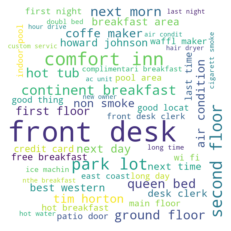

In [201]:
plotWordCloud(topk_neg, **wordcloud_args)

In [202]:
combined_words = set([i[0] for i in topk_pos] + [i[0] for i in topk_neg])
combined_count = Counter(combined_words)
for i in topk_pos+topk_neg:
    if i[0] in combined_words:
        combined_count[i[0]] += i[1]
', '.join([i[0] for i in combined_count.most_common(5)])

'front desk, best western, second floor, comfort inn, continent breakfast'

Many NPs are included in both the top 50 positive and negative reviews. Some common words which are large in both word clouds are 'front desk, second floor, comfort inn, continent breakfast'

c)

In [115]:
grammar2 = r"""
    NBAR:
        {<NN.*|JJ>*<VB.*>*<JJ.*>}
    NP:
        {<NBAR><IN><NBAR>}
        {<NBAR>}
"""

In [203]:
topk_pos = getTopKNP(df[df['groundTruth'] == 'positive'], 50, grammar2)
topk_pos

[('bed comfort', 71),
 ('best western', 39),
 ('make sure', 22),
 ('food excel', 20),
 ('year old', 19),
 ('clean comfort', 18),
 ('breakfast good', 17),
 ('breakfast delici', 17),
 ('breakfast great', 16),
 ('servic excel', 14),
 ('bit date', 13),
 ('littl date', 13),
 ('everyth clean', 11),
 ('breakfast excel', 11),
 ('flat screen', 10),
 ('clean friendli', 10),
 ('bed comfi', 10),
 ('food good', 10),
 ('servic great', 10),
 ('food great', 10),
 ('feel welcom', 9),
 ('pet friendli', 9),
 ('bathroom clean', 8),
 ('food delici', 8),
 ('locat perfect', 8),
 ('bed super', 8),
 ('felt safe', 8),
 ('nice clean', 8),
 ('clean quiet', 7),
 ('restaur excel', 7),
 ('locat good', 7),
 ('bit small', 6),
 ('price right', 6),
 ('front desk', 6),
 ('friendli help', 6),
 ('comfort clean', 6),
 ('bed great', 6),
 ('locat conveni', 5),
 ('arriv late', 5),
 ('place clean', 5),
 ('park right', 5),
 ('nice comfort', 5),
 ('includ hot', 5),
 ('say enough', 5),
 ('quiet comfort', 5),
 ('clean spaciou', 5),

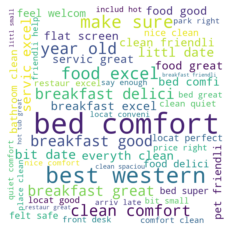

In [205]:
plotWordCloud(topk_pos, **wordcloud_args)

In [206]:
topk_neg = getTopKNP(df[df['groundTruth'] == 'negative'], 50, grammar2)
topk_neg

[('bed comfort', 35),
 ('bathroom clean', 9),
 ('noth special', 8),
 ('breakfast terribl', 7),
 ('best western', 7),
 ('make sure', 6),
 ('bed uncomfort', 6),
 ('bed clean', 5),
 ('year old', 5),
 ('bed good', 5),
 ('look clean', 4),
 ('feel safe', 4),
 ('look like', 4),
 ('pet friendli', 4),
 ('pool great', 4),
 ('pool clean', 4),
 ('front desk', 4),
 ('pool nice', 4),
 ('breakfast good', 4),
 ('bit date', 4),
 ('get rid', 4),
 ('get better', 4),
 ('get readi', 4),
 ('place old', 3),
 ('sheet clean', 3),
 ('anyth special', 3),
 ('nthe clean', 3),
 ('smoke free', 3),
 ('breakfast fine', 3),
 ('clean comfort', 3),
 ('bed old', 3),
 ('servic good', 3),
 ('night nthe', 3),
 ('carpet filthi', 3),
 ('stifl hot', 2),
 ('month old', 2),
 ('wifi free', 2),
 ('bed u002f', 2),
 ('clean good', 2),
 ('queen bed clean', 2),
 ('clean old', 2),
 ('paper thin', 2),
 ('think next', 2),
 ('expect better', 2),
 ('front desk ladi', 2),
 ('front lobbi clean', 2),
 ('comfort good', 2),
 ('tea nthe', 2),
 ('

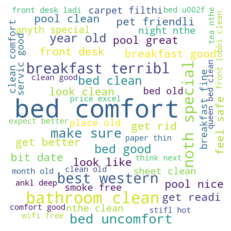

In [208]:
plotWordCloud(topk_neg, **wordcloud_args)

The top 50 for both grammars include phrases about the cleanliness of the room, the comfort of the bed, the friendliness of the staf, and the breakfast. However, the new grammar includes more phrases expressing emotions or feelings towards topics, such as "breakfast terribl" instead of just mentioning the topic like "continent breakfast" which was frequent with the first grammar. The positive case also has many more phrases which express the quality of the services instead of just the topics. For example, the new grammar says "breakfast delici" instead of just "continent breakfast" or "breakfast buffet".

I think the second pattern will be better since it has more detailed phrases that more often contain words relating to the sentiment of the phrase. But, these phrases are more specific and therefore might be harder to generalize to future reviews outside the training set.

# Q3

In [125]:
# get Top K mutual information terms from the dataframe
def getMI(topk, df, label_column='groundTruth'):
    miScore = []
    for word in topk:
        miScore.append([word[0]]+[metrics.mutual_info_score(df[label_column], df[word[0]])])
    miScoredf = pd.DataFrame(miScore).sort_values(1,ascending=0)
    miScoredf.columns = ['Word','MI Score']
    return miScoredf

In [126]:
topk = getTopKWords(df, 2000)
finaldf = dataFrameTransformation(df, topk)
miScoredf = getMI(topk, finaldf)
miScoredf[:50]['Word'].values

array(['dirty', 'great', 'excellent', 'told', 'smell', 'smoke',
       'fireplace', 'comfortable', 'said', 'restaurant', 'old',
       'disgusting', 'wonderful', 'carpet', 'asked', 'worst', 'musty',
       'smelled', 'refund', 'left', 'sheets', 'rude', 'never', 'night',
       'filthy', 'paid', 'broken', 'terrible', 'cleaned', 'smoking',
       'cigarette', 'nothing', 'carpets', 'buffet', 'could', 'friendly',
       'floor', 'loud', 'recommend', 'stained', 'looked', 'bathroom',
       'enjoyed', 'definitely', 'tired', 'always', 'worn', 'cheap', 'non',
       'someone'], dtype=object)

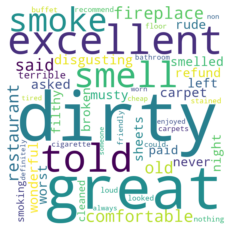

In [127]:
plotWordCloud(zip(miScoredf[:50]['Word'].values, miScoredf[:50]['MI Score'].values), **wordcloud_args)

The highest MI value words are "dirty", "great", and "excellent", which makes sense since a dirty room is very bad, while saying something is "great" or "excellent" is a strong positive sentiment.

In [209]:
topkNP = getTopKNP(df, 1000, grammar = grammar2)
finaldfNP = NPdataFrameTransformation(df, topkNP, grammar2)
miScoredfNP = getMI(topkNP, finaldfNP)
miScoredfNP[:50]['Word'].values

array(['bed uncomfort', 'noth special', 'food excel', 'bed clean',
       'breakfast terribl', 'breakfast delici', 'look clean', 'pool nice',
       'look like', 'get better', 'bed good', 'bed old', 'carpet filthi',
       'place old', 'everyth clean', 'food great', 'servic great',
       'flat screen', 'get rid', 'locat perfect', 'food delici',
       'bit stiff', 'guess ok', 'breakfast horribl', 'way overpr',
       'call free', 'thing clean', 'breakfast okay', 'paper thin',
       'stifl hot', 'ankl deep', 'bathroom light', 'front desk rude',
       'floor big', 'stair old', 'need major', 'expect low', 'door open',
       'eat nearbi', 'comfort flat screen', 'wifi free', 'price excel',
       'tea nthe', 'front lobbi clean', 'front desk ladi',
       'expect better', 'think next', 'decent littl', 'queen bed clean',
       'noth wrong'], dtype=object)

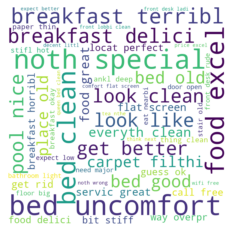

In [210]:
plotWordCloud(zip(miScoredfNP[:50]['Word'].values, miScoredfNP[:50]['MI Score'].values), **wordcloud_args)

Many of the top noun phrases in terms of MI were discussing the state of the bed: "bed uncomfort", "bed clean", "bed good", "bed old", etc. So, the state of the bed appears to be most important to customers, and hotels should ensure the bed is comfy and clean.

Some other topics of interest are breakfast ("breakfast terribl" and "breakfast delici"), cleanliness of other things ('carpet filthi', 'everyth clean', 'thing clean'), and services/ammenities ('pool nice', 'servic great', 'front desk rude'), so improving the breakfast options, ensuring everything is clean, and improving or including extra services/amenities seems to be the next best options for improving the hotel.

# Q4

In [211]:
# Compute PMI for all terms and all possible labels
def pmiForAllCal(df, topk_word, gt_sentiment, label_column='groundTruth'):
    #Try calculate all the pmi for top k and store them into one pmidf dataframe

    index = [x[0] for x in topk_word]
    pmiDf = pd.DataFrame(index=index, columns=['pmi'])

    for (word, count) in tqdm(topk_word):
        pmiDf.at[word, 'pmi'] = pmiCalc(df,word,gt_sentiment,label_column)

    return pmiDf


def pmiCalc(df, word, gt_sentiment, label_column='groundTruth'):

    N = df.shape[0]

    px = sum(df[label_column]==gt_sentiment)
    py = sum(df[word]==True)
    pxy = len(df[(df[label_column]==gt_sentiment) & (df[word]==True)])

    if pxy==0:#Log 0 cannot happen
        pmi = math.log((pxy+0.0001)*N/(px*py))
    else:
        pmi = math.log(pxy*N/(px*py))
    return pmi

In [154]:
pmiposdf = pmiForAllCal(finaldf,topk,'positive').sort_values('pmi',ascending=0)

100%|██████████| 2000/2000 [00:03<00:00, 651.62it/s]


In [155]:
pmiposdf[:50]

,pmi
genuine,0.325662
andrew,0.325662
restful,0.325662
cycling,0.325662
heritage,0.325662
meetings,0.325662
relaxed,0.325662
cute,0.325662
dine,0.325662
attended,0.325662


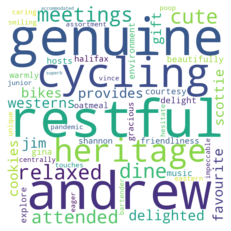

In [157]:
plotWordCloud(zip(pmiposdf[:50].index, pmiposdf[:50]['pmi'].values), **wordcloud_args)

Andrew appears as a high PMI word: this is likely due to a location specific staff member called Andrew, and all reviews that mention him are positive. We also see "Jim" and "Gina", likely more staff members.

Genuine has a high PMI: this suggests that a customer believing the location or staff are genuine is valued very positively, as all reviews that mention it are positive. It is interesting since it doesn't show up in other lists, likely due to the low occurance of the word.

We also see "Halifax" show up in the top 50. This is very interesting: it just so happens that several of the hotels have reviews from people travelling to/from Halifax. Cornwall is a common city to pass through on the route between Halifax and Toronto, so this makes sense. All people mentioning Halifax have positive reviews, and there are a lot of possible explanations for this. It could just be that positive reviews tend to mention the locations more since they tend to be more conversational, light-hearted or focused on the enjoyment of the trip. It may also be that the long trip to/from Halifax improves perception of the hotel. Finally, it may be that people travelling to/from Halifax tend to leave more positive reviews. Without more info, it's impossible to tell which explanation is correct or how much of a role it plays.

In [163]:
pminegdf = pmiForAllCal(finaldf,topk,'negative').sort_values('pmi',ascending=0)

100%|██████████| 2000/2000 [00:02<00:00, 770.97it/s] 


In [165]:
pminegdf[:50]

,pmi
calls,1.280311
blood,1.280311
policy,1.280311
degrees,1.280311
vacuumed,1.280311
confirmation,1.280311
drain,1.280311
mould,1.280311
smelly,1.280311
telephone,1.280311


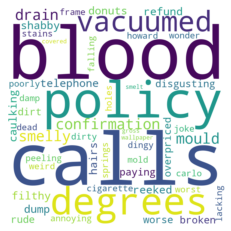

In [164]:
plotWordCloud(zip(pminegdf[:50].index, pminegdf[:50]['pmi'].values), **wordcloud_args)

Once again we see mention of staff, such as "Howard" and "Carlo", this time in a negative light

It's interesting to see policy have a high PMI for negative reviews, in general use it sounds pretty neutral but this shows that people mostly talk about policy when they dislike it.

Confirmation is much like policy; it seems to be mostly brought up when there's an issue, despite not sounding like a negative word in other context.

In [220]:
pmiposdf = pmiForAllCal(finaldfNP,topkNP,'positive').sort_values('pmi',ascending=0)

100%|██████████| 1000/1000 [00:00<00:00, 1069.79it/s]


In [221]:
pmiposdf[:50]

,pmi
bathroom compact,0.325662
call next,0.325662
everyth wonder,0.325662
jacuzzi nice,0.325662
employe great,0.325662
rate good,0.325662
midnight music loud,0.325662
bit worn,0.325662
locat fabul,0.325662
breakfast buffet great,0.325662


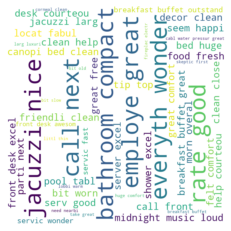

In [222]:
plotWordCloud(zip(pmiposdf[:50].index, pmiposdf[:50]['pmi'].values), **wordcloud_args)

It is interesting to see "bit worn" have a high positive PMI, since that usually is negative. But, this shows that customers are willing to accept things a bit worn and still give positive reviews.

We see mention of "cornwal clean", which doesn't seem to have a direct meaning but is location specific.

We also see several phrases mention a jacuzzi, which shows the positive experience contributed by a good jacuzzi in the room.

In [223]:
pminegdf = pmiForAllCal(finaldfNP,topkNP,'negative').sort_values('pmi',ascending=0)

100%|██████████| 1000/1000 [00:00<00:00, 1111.12it/s]


In [224]:
pminegdf[:50]

,pmi
pickup soft,1.280311
bathroom good,1.280311
updat u002fupgrad,1.280311
desk pictur u002fbathroom,1.280311
someth cold,1.280311
nmi biggest,1.280311
tub drain slow,1.280311
meet minimum,1.280311
updat real good,1.280311
smell bad,1.280311


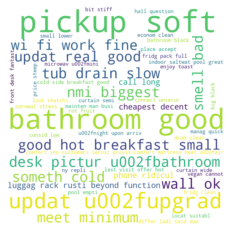

In [225]:
plotWordCloud(zip(pminegdf[:50].index, pminegdf[:50]['pmi'].values), **wordcloud_args)

'bathroom good' is unexpected to be part of a negative PMI, but it may show that customers aren't suitably pleased by just having a good bathroom.

'vegan cannot' shows up, it may show that not having vegan options is a dealbreaker for vegans that would result in negative reviews.

'meet minimum' may indicate that a hotel that meets the minimum requirements still may acheive a negative review.

In [230]:
top_df = df[df['hotelName']=='Auberge Chesley&#39;s Inn']
bot_df = df[df['hotelName']=='Howard Johnson by Wyndham Cornwall']

In [248]:
topk1 = getTopKWords(top_df, 1000)
finaldf1 = dataFrameTransformation(df, topk1)[df['hotelName']=='Auberge Chesley&#39;s Inn']
topkNP1 = getTopKNP(top_df, 1000, grammar = grammar2)
finaldfNP1 = NPdataFrameTransformation(top_df, topkNP1, grammar2)

100%|██████████| 1000/1000 [00:00<00:00, 2143.60it/s]


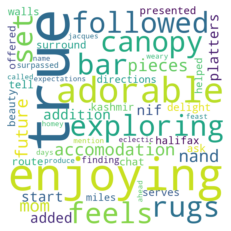

In [249]:
pmidf = pmiForAllCal(finaldf1,topk1,'positive').sort_values('pmi',ascending=0)
plotWordCloud(zip(pmidf[:50].index, pmidf[:50]['pmi'].values), **wordcloud_args)

100%|██████████| 1000/1000 [00:00<00:00, 2395.30it/s]


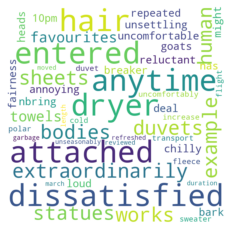

In [250]:
pmidf = pmiForAllCal(finaldf1,topk1,'negative').sort_values('pmi',ascending=0)
plotWordCloud(zip(pmidf[:50].index, pmidf[:50]['pmi'].values), **wordcloud_args)

100%|██████████| 260/260 [00:00<00:00, 2389.45it/s]


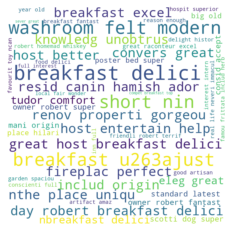

In [261]:
pmidf = pmiForAllCal(finaldfNP1,topkNP1,'positive').sort_values('pmi',ascending=0)
plotWordCloud(zip(pmidf[:50].index, pmidf[:50]['pmi'].values), **wordcloud_args)

100%|██████████| 260/260 [00:00<00:00, 1959.53it/s]


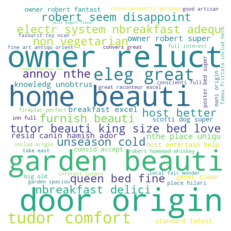

In [330]:
pmidf = pmiForAllCal(finaldfNP1,topkNP1,'negative').sort_values('pmi',ascending=0)
plotWordCloud(zip(pmidf[:50].index, pmidf[:50]['pmi'].values+min(pmidf[:50]['pmi'].values)), **wordcloud_args)

In [334]:
topk1 = getTopKWords(bot_df, 1000)
finaldf1 = dataFrameTransformation(df, topk1)[df['hotelName']=='Howard Johnson by Wyndham Cornwall']
topkNP1 = getTopKNP(bot_df, 1000, grammar = grammar2)
finaldfNP1 = NPdataFrameTransformation(bot_df, topkNP1, grammar2)

100%|██████████| 1000/1000 [00:00<00:00, 2240.25it/s]


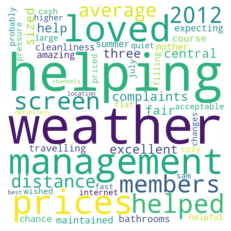

In [336]:
pmidf = pmiForAllCal(finaldf1,topk1,'positive').sort_values('pmi',ascending=0)
plotWordCloud(zip(pmidf[:50].index, pmidf[:50]['pmi'].values), **wordcloud_args)

100%|██████████| 1000/1000 [00:00<00:00, 2078.41it/s]


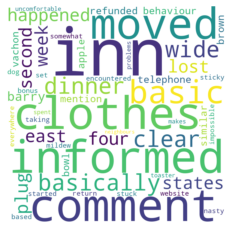

In [337]:
pmidf = pmiForAllCal(finaldf1,topk1,'negative').sort_values('pmi',ascending=0)
plotWordCloud(zip(pmidf[:50].index, pmidf[:50]['pmi'].values), **wordcloud_args)

  0%|          | 0/289 [00:00<?, ?it/s]

100%|██████████| 289/289 [00:00<00:00, 2360.00it/s]


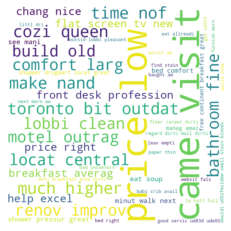

In [339]:
pmidf = pmiForAllCal(finaldfNP1,topkNP1,'positive').sort_values('pmi',ascending=0)
plotWordCloud(zip(pmidf[:50].index, pmidf[:50]['pmi'].values+min(pmidf[:50]['pmi'].values)), **wordcloud_args)

100%|██████████| 289/289 [00:00<00:00, 2182.77it/s]


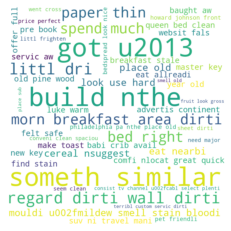

In [340]:
pmidf = pmiForAllCal(finaldfNP1,topkNP1,'negative').sort_values('pmi',ascending=0)
plotWordCloud(zip(pmidf[:50].index, pmidf[:50]['pmi'].values+min(pmidf[:50]['pmi'].values)), **wordcloud_args)

The best hotel seems to be modern, have nice rugs, and really amazing breakfast. The worst hotel seems to be dirty, have thin walls, mould and even blood stains. The grammar I selected does give good insight into the pros and cons of both hotels

# Q5

**Note** Remember to save a static image of the map in the notebook

In [341]:
def getHistogram(df, measure, title,figsize=(10,5)):
    fig = plt.figure(figsize=figsize)
    plt.title(title)

    if measure=='both':
        x = [df['ratingScore'].values/5]
        y = [df['vader'].values]
        bins = np.linspace(-1, 1, 100)
        plt.hist(x, bins, label='normalized Ground Truth')
        plt.hist(y, bins, label='vader')
        plt.legend(loc='upper right')
        plt.xlabel("Value")
        plt.ylabel("Frequency")
    else:
        plt.hist(df[measure].values)

    plt.xlabel("Value")
    plt.ylabel("Frequency")

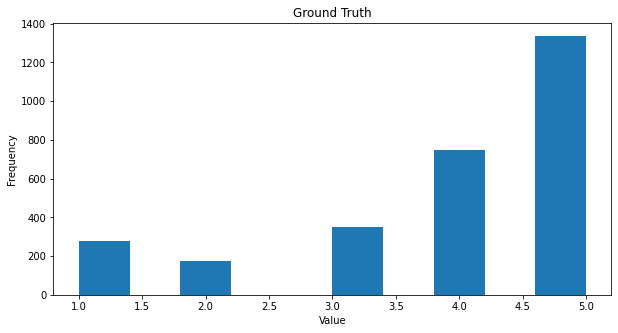

In [342]:
getHistogram(df,'ratingScore', 'Ground Truth')

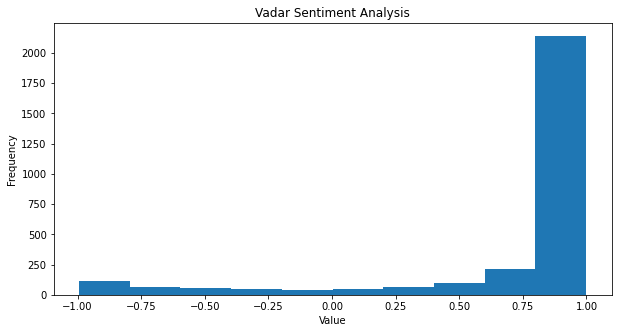

In [343]:
getHistogram(df, 'vader', 'Vadar Sentiment Analysis')

It is interesting that the Vader sentiment is so much more skewed to positive values. This is not surprising after thinking about it, since many reviews say good things about the hotel even if the overall experience was mediocre or negative; it's usually a few things that are very bad that lowers the rating. For example, saying something is "pretty good" might sound good but in terms of review score it can still be mediocre.

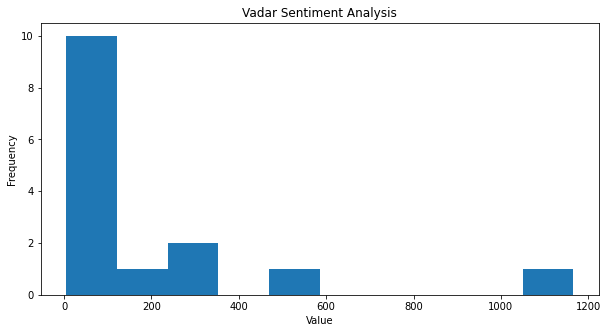

In [352]:
getHistogram(df.groupby('hotelName').count(), 'ratingScore', 'Vadar Sentiment Analysis')

There appears to be a skew towards lower reviews, with only one place having over 1000 reviews.

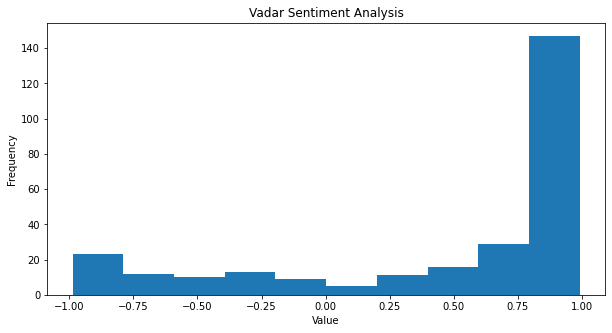

In [355]:
getHistogram(df[df['hotelName'] == 'Super 8 by Wyndham Cornwall ON'], 'vader', 'Vadar Sentiment Analysis')

<Axes: xlabel='ratingScore', ylabel='hotelName'>

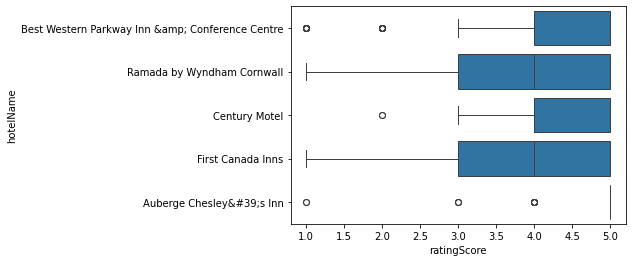

In [368]:
sns.boxplot(data=df[df['hotelName'].isin(true_sort[:5]['hotelName'])], y="hotelName", x="ratingScore")

<Axes: xlabel='vader', ylabel='hotelName'>

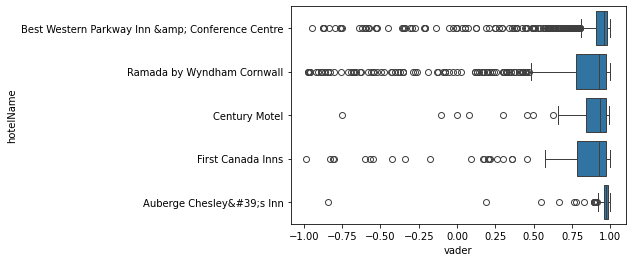

In [369]:
sns.boxplot(data=df[df['hotelName'].isin(true_sort[:5]['hotelName'])], y="hotelName", x="vader")

In [373]:
df[df['hotelName'].isin(true_sort[:5]['hotelName'])]['ratingScore'].mean(), df[df['hotelName'].isin(true_sort[:5]['hotelName'])]['ratingScore'].var()

(4.352542372881356, 0.924103271580607)

In [374]:
df[df['hotelName'].isin(true_sort[:5]['hotelName'])]['vader'].mean(), df[df['hotelName'].isin(true_sort[:5]['hotelName'])]['vader'].var()

(0.8262712832929782, 0.12420693025537756)

The boxplots are much more informative, since they show the distribution of the data better. The data is skewed towards the higher scores for both metrics, and thus the mean is much lower than the median. the variance is also harder to interpret for this non-normal data distribution.

Text(0.5, 0, 'Vader Score')

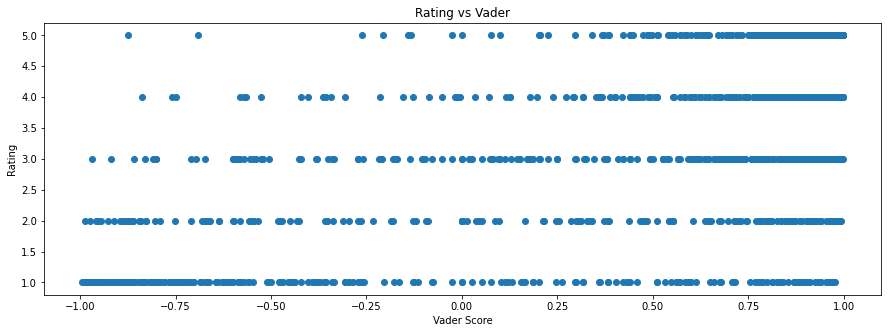

In [376]:
fig, ax = plt.subplots(1,1,figsize=(15,5),sharex=False,sharey=False)
rating_scores = df['ratingScore'].values
vader_scores = df['vader'].values
ax.plot(vader_scores, rating_scores,"o")

ax.set_title('Rating vs Vader')
ax.set_ylabel('Rating')
ax.set_xlabel('Vader Score')

Text(0.5, 1.0, 'Rating vs Vader - heatmap')

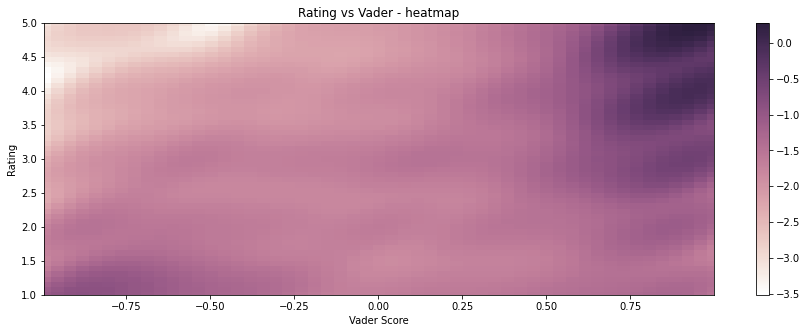

In [380]:
k = gaussian_kde(np.vstack([vader_scores, rating_scores]))
xi, yi = np.mgrid[vader_scores.min():vader_scores.max():vader_scores.size**0.5*1j,rating_scores.min():rating_scores.max():rating_scores.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, ax1 = plt.subplots(1,1, figsize=(15,5))


b1 = ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(vader_scores.min(), vader_scores.max())
ax1.set_ylim(rating_scores.min(), rating_scores.max())

ax1.set_xlabel('Vader Score')
ax1.set_ylabel('Rating')

fig.colorbar(b1, ax=ax1)

ax1.set_title('Rating vs Vader - heatmap')

I can vaguely see that the lower Vader scores are correlated with lower Ratings, since there is a high density of data at -1, 1 and another high density at 1, 5. This shows that Vader score does have some correlation to true ratings, but it's far from perfect 

Text(0.5, 0, 'Length')

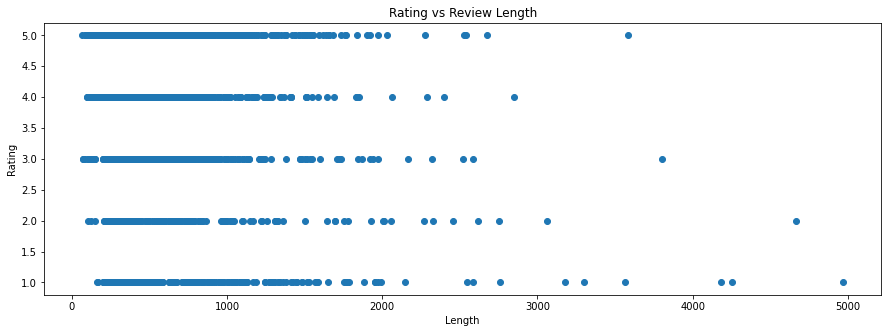

In [385]:
fig, ax = plt.subplots(1,1,figsize=(15,5),sharex=False,sharey=False)
#rating_scores = df['ratingScore'].values
#vader_scores = df['vader'].values
review_len = np.array([len(i) for i in df['reviewColumn'].values])

ax.plot(review_len, rating_scores,"o")

ax.set_title('Rating vs Review Length')
ax.set_ylabel('Rating')
ax.set_xlabel('Length')

Text(0.5, 1.0, 'Rating vs Review Length - heatmap')

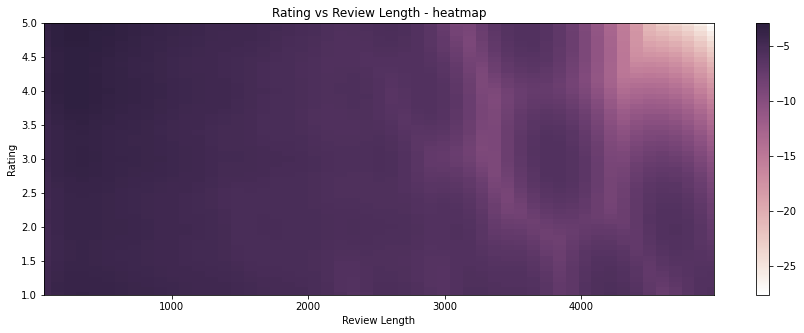

In [386]:
k = gaussian_kde(np.vstack([review_len, rating_scores]))
xi, yi = np.mgrid[review_len.min():review_len.max():review_len.size**0.5*1j,rating_scores.min():rating_scores.max():rating_scores.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, ax1 = plt.subplots(1,1, figsize=(15,5))


b1 = ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(review_len.min(), review_len.max())
ax1.set_ylim(rating_scores.min(), rating_scores.max())

ax1.set_xlabel('Review Length')
ax1.set_ylabel('Rating')

fig.colorbar(b1, ax=ax1)

ax1.set_title('Rating vs Review Length - heatmap')

Text(0.5, 0, 'Length')

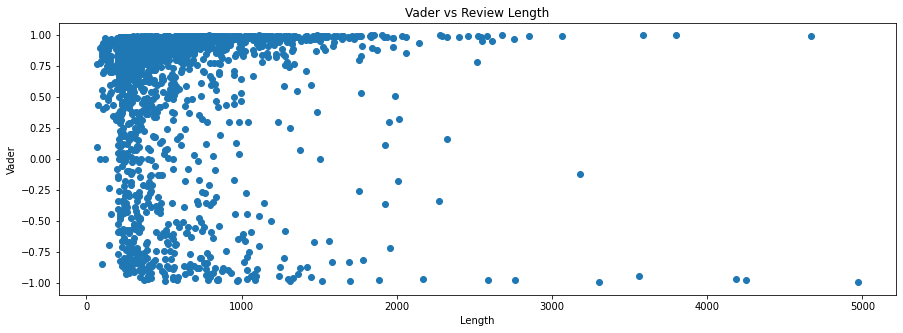

In [387]:
fig, ax = plt.subplots(1,1,figsize=(15,5),sharex=False,sharey=False)
review_len = np.array([len(i) for i in df['reviewColumn'].values])

ax.plot(review_len, vader_scores,"o")

ax.set_title('Vader vs Review Length')
ax.set_ylabel('Vader')
ax.set_xlabel('Length')

Text(0.5, 1.0, 'Vader vs Review Length - heatmap')

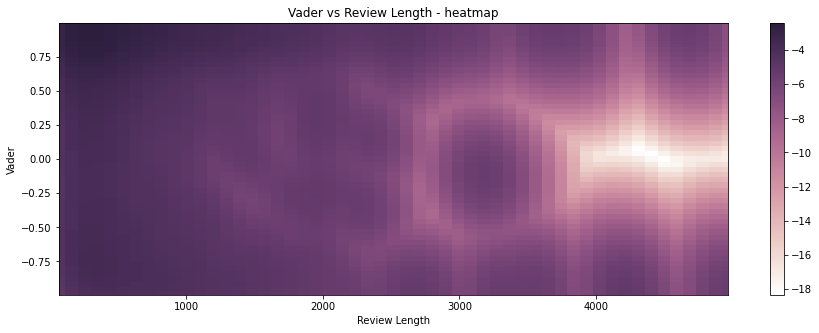

In [389]:
k = gaussian_kde(np.vstack([review_len, vader_scores]))
xi, yi = np.mgrid[review_len.min():review_len.max():review_len.size**0.5*1j,vader_scores.min():vader_scores.max():vader_scores.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, ax1 = plt.subplots(1,1, figsize=(15,5))


b1 = ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(review_len.min(), review_len.max())
ax1.set_ylim(vader_scores.min(), vader_scores.max())

ax1.set_xlabel('Review Length')
ax1.set_ylabel('Vader')

fig.colorbar(b1, ax=ax1)

ax1.set_title('Vader vs Review Length - heatmap')

There is a slight U-shape to the data: the longer reviews tend to be more extreme towards either positive or negative scores.

This trend appears much more visibly in the Vader scores than the ratings.

C:\Users\kirby\AppData\Local\Temp/ipykernel_49616/4129118619.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax.plot(df.groupby('hotelName').count()['ratingScore'].values, df.groupby('hotelName').mean()['ratingScore'].values,"o")


Text(0.5, 0, '# Reviews')

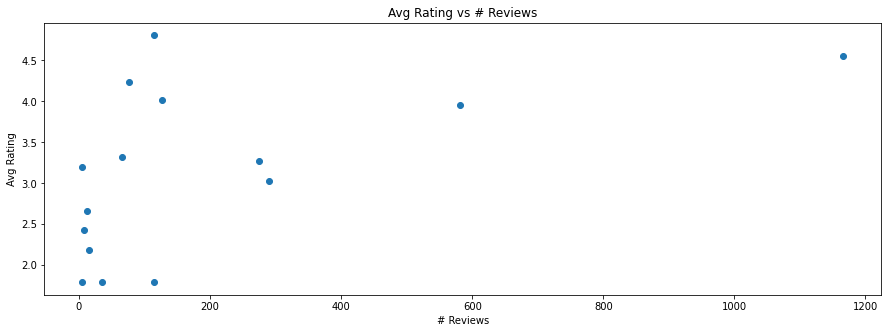

In [397]:
fig, ax = plt.subplots(1,1,figsize=(15,5),sharex=False,sharey=False)
review_len = np.array([len(i) for i in df['reviewColumn'].values])

ax.plot(df.groupby('hotelName').count()['ratingScore'].values, df.groupby('hotelName').mean()['ratingScore'].values,"o")

ax.set_title('Avg Rating vs # Reviews')
ax.set_ylabel('Avg Rating')
ax.set_xlabel('# Reviews')

C:\Users\kirby\AppData\Local\Temp/ipykernel_49616/2829231197.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax.plot(df.groupby('hotelName').count()['ratingScore'].values, df.groupby('hotelName').mean()['vader'].values,"o")


Text(0.5, 0, '# Reviews')

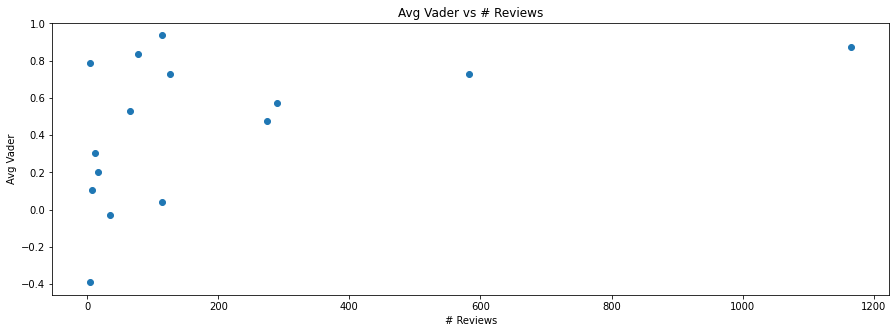

In [398]:
fig, ax = plt.subplots(1,1,figsize=(15,5),sharex=False,sharey=False)
review_len = np.array([len(i) for i in df['reviewColumn'].values])

ax.plot(df.groupby('hotelName').count()['ratingScore'].values, df.groupby('hotelName').mean()['vader'].values,"o")

ax.set_title('Avg Vader vs # Reviews')
ax.set_ylabel('Avg Vader')
ax.set_xlabel('# Reviews')

More reviews typically have high scores for both rating and vader.

However, it is possible to have high scores with low # reviews, but a low # of ratings only has low scoring hotels.

In [402]:
def make_address(row):
      # individual columns need to be combined
    print(row['streetAddress'], row['City'], row['Province'])
    return row['streetAddress']+", "+row['City']+", "+row['Province']

In [413]:
hotel_scores.drop(columns=['hotelName'])

,mean ground truth,mean vader compound,median vader compound
0,4.807018,0.935478,0.97300
1,4.548885,0.874945,0.95730
2,4.233766,0.834825,0.93160
3,3.031034,0.574015,0.89950
4,3.323077,0.529631,0.83600
5,4.015873,0.729245,0.92585
6,1.789474,0.041847,0.03870
7,2.187500,0.201037,0.45765
8,2.666667,0.303600,0.37765
9,1.800000,-0.029906,-0.36370


In [426]:
# Need the location for each hotel in a format the tool can handle

geo_rating_df = hotel_scores.drop(columns=['hotelName']).join(df.groupby('hotelName', as_index= False).agg({'streetAddress':lambda x: x.iloc[0],'City':'max','Province':'max','postalCode':'max'}))
geo_rating_df['formed_address'] = geo_rating_df.apply(make_address , axis=1)
geo_rating_df = geo_rating_df.replace(["6032 Lundy's Lane, Niagara Falls, Ontario"],'732 Manzanita Dr, Laguna Beach, California')
geo_rating_df = geo_rating_df.head()

40 First St W ('Cornwall',) Ontario
1515 Vincent Massey Dr ('Cornwall',) Ontario
1209 Brookdale Ave ('Cornwall',) Ontario
1625 Vincent Massey Dr Rr 2 ('Cornwall',) Ontario
1123 Brookdale Ave ('Cornwall',) Ontario
1618 Vincent Massey Dr ('Cornwall',) Ontario
1142 Brookdale Ave ('Cornwall',) Ontario
1750 Vincent Massey Dr ('Cornwall',) Ontario
2200 Vincent Massey Dr ('Cornwall',) Ontario
1700 Montreal Rd ('Cornwall',) Ontario
2120 Vincent Massey Dr ('Cornwall',) Ontario
1618 Vincent Massey Dr ('Cornwall',) Ontario
805 Brookdale Ave ('Cornwall',) Ontario
1620 Vincent Massey Dr ('Cornwall',) Ontario
2694 Brookdale Ave ('Cornwall',) Ontario


In [427]:
# 0 - need to give the tool a generic name.
locator = Photon(user_agent='myGeocoder')
# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2 - form the location string
geo_rating_df['location'] = geo_rating_df['formed_address'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
geo_rating_df['point'] = geo_rating_df['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
geo_rating_df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(geo_rating_df['point'].tolist(), index=geo_rating_df.index)

geo_rating_df.head()

,mean ground truth,mean vader compound,median vader compound,hotelName,streetAddress,City,Province,postalCode,formed_address,location,point,latitude,longitude,altitude
0,4.807018,0.935478,0.9730,Auberge Chesley&#39;s Inn,40 First St W,"('Cornwall',)",Ontario,K6J 1B9,"40 First St W, ('Cornwall',), Ontario","(40, First Street West, K6J 3P4, First Street West, Cornwall, Ontario, Canada, (45.0161711, -74.7297358))","(45.0161711, -74.7297358, 0.0)",45.016171,-74.729736,0.0
1,4.548885,0.874945,0.9573,Best Western Parkway Inn &amp; Conference Centre,1515 Vincent Massey Dr,"('Cornwall',)",Ontario,K6H 5R6,"1515 Vincent Massey Dr, ('Cornwall',), Ontario","(1515, Vincent Massey Drive, K6J 4R1, Vincent Massey Drive, Cornwall, Ontario, Canada, (45.0301233, -74.7557485))","(45.0301233, -74.7557485, 0.0)",45.030123,-74.755748,0.0
2,4.233766,0.834825,0.9316,Century Motel,1209 Brookdale Ave,"('Cornwall',)",Ontario,K6J 4P7,"1209 Brookdale Ave, ('Cornwall',), Ontario","(1209, Brookdale Avenue, K6J 5B1, Brookdale Avenue, Cornwall, Ontario, Canada, (45.0271268, -74.7519411))","(45.0271268, -74.7519411, 0.0)",45.027127,-74.751941,0.0
3,3.031034,0.574015,0.8995,Comfort Inn,1625 Vincent Massey Dr Rr 2,"('Cornwall',)",Ontario,K6H 5R6,"1625 Vincent Massey Dr Rr 2, ('Cornwall',), Ontario","(1625, Vincent Massey Drive, K6J 2H5, Vincent Massey Drive, Cornwall, Ontario, Canada, (45.03099311799163, -74.76307941255229))","(45.03099311799163, -74.76307941255229, 0.0)",45.030993,-74.763079,0.0
4,3.323077,0.529631,0.8360,Elect Inn 5,1123 Brookdale Ave,"('Cornwall',)",Ontario,K6J 4P6,"1123 Brookdale Ave, ('Cornwall',), Ontario","(1123, Brookdale Avenue, K6J 5B1, Brookdale Avenue, Cornwall, Ontario, Canada, (45.02601424285714, -74.75099371428571))","(45.02601424285714, -74.75099371428571, 0.0)",45.026014,-74.750994,0.0


In [428]:
map1 = folium.Map(
    location=[45.0228, -74.7292], # <- this will need to be set based on your own hotels
    tiles='cartodbpositron',
    zoom_start=12,
)

geo_rating_df.dropna().apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]], color='#d7191c').add_to(map1), axis=1)

map1